# one-step delta learning rule

In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from cswtask import *
from cswagents import *

In [3]:
# generate experiment
task = Task()
ag = Agent()

ntr,nte = 160,40
cond = 'bloc'
exp,cur = task.generate_experiment(cond,ntr,nte)
# exp

In [4]:
accL = []
peL = []
nschL = []
for i in range(50):
  ag = Agent()
  
  exp,cur = task.generate_experiment(cond,ntr,nte)
  acc,pe = ag.forward_exp(exp) 
  accL.append(acc)
  peL.append(pe)
  nschL.append(len(ag.schlib))
  
np.mean(nschL)

58.78

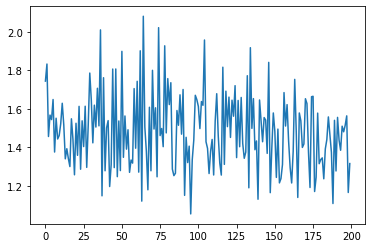

In [5]:
acc = np.mean(accL,0)
pe = np.mean(peL,0)
acc.shape
plt.plot(pe)


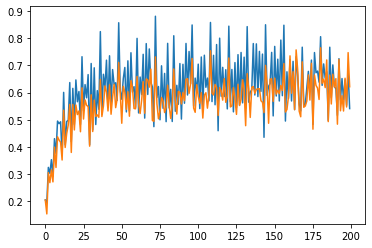

In [6]:
plt.plot(acc)

In [7]:
# npaths,ntsteps = 4,2
# f,axar = plt.subplots(4,2,figsize=(14,8),sharex=True,sharey=True);
# for pidx,tidx in itertools.product(range(npaths),range(ntsteps)):
#   ax = axar[pidx,tidx]
#   ax.set_title("p%i-t%i"%(pidx,tidx))
#   ax.plot(acc[:,pidx,tidx])
#   ax.set_ylim(0,1)
#   ax.axhline(.5,c='k',lw=.3)

- where is my intuition wrong? blocked should have fewer PE spikes above thresh, and thus invoke fewer schemas. interleaved should have many random spikes, thus invoking a bunch of schemas. 
- include sticky bias: probability of switching controled by time since last switch. 
    - nb interleaved fails if noswitch
    - current mechanism could just be switching until randomly arrives at good 2 enough initial schs
- another possibility is that schemas which were active in recent past also get incrementally updated